#Machine Learning Model: Facial Recognition
This notebook demonstrates face recognition using Principal Component Analysis (PCA) and a Support Vector Machine (SVM). We will use the Labeled Faces in the Wild (LFW) dataset.

##Import all the necessary libraries
We import the necessary Python libraries for data handling, visualization, and machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset
We use `fetch_lfw_people` from `sklearn.datasets` to load the Labeled Faces in the Wild (LFW) dataset, which consists of images of faces with labels.

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50,download_if_missing=True)

## Explore the Dataset
Let's examine the dataset shape and visualize some sample images.

In [4]:
faces.data.shape

(1560, 2914)

In [5]:
faces.images[9].shape

(62, 47)

In [6]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [7]:
faces.target_names.size

12

In [8]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
faces.target_names[0]

np.str_('Ariel Sharon')

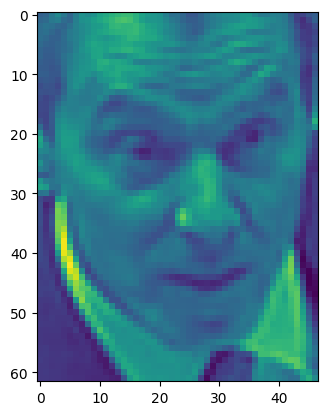

In [10]:
plt.imshow(faces.images[0])

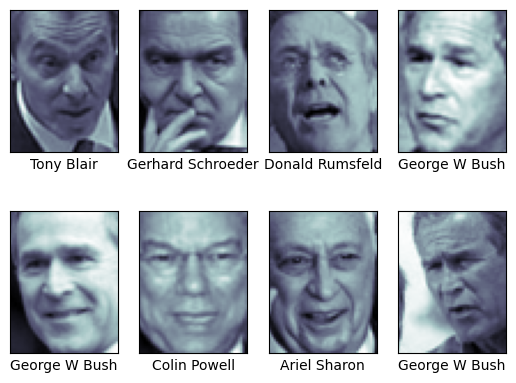

In [11]:
fig, ax = plt.subplots(2,4)
for idx, axidx in enumerate(ax.flat):
  axidx.imshow(faces.images[idx], cmap='bone')
  axidx.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[idx]])

## 4. Preprocess the Data
We apply Principal Component Analysis (PCA) to reduce dimensionality while retaining important features.

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [13]:
# Apply Principal Component Analysis (PCA) for dimensionality reduction
pcaMod = PCA(n_components=150,whiten=True)
# Train a Support Vector Classifier (SVC) for face recognition
svmMod = SVC(kernel='rbf', class_weight='balanced')
mdl = make_pipeline(pcaMod, svmMod)

##Train a Machine Learning Model
We train a Support Vector Machine (SVM) classifier on the dataset to recognize faces.

###Split the dataset into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2)

###Perform hyperparameter tuning using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,15,30], 'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid = GridSearchCV(mdl, param_grid)

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [17]:
print(grid.best_params_) #Display the best parameters found

{'svc__C': 1, 'svc__gamma': 0.005}


In [18]:
mdl = grid.best_estimator_

###Make predictions on the test set

In [19]:
y_pred = mdl.predict(X_test)

In [20]:
y_test

array([ 8,  0,  0,  3, 11,  1,  1,  3,  4,  1, 11,  1, 11,  3,  3,  6,  3,
       11,  7,  1,  6,  3,  4,  3,  7,  6,  8,  0,  1,  0,  3, 11,  4,  3,
        4,  8,  7,  3,  0,  0, 11,  0,  3,  3,  0,  1,  3,  1, 10, 10,  1,
        8,  1,  9,  3,  6, 11,  5,  9,  2,  5,  3, 11,  3,  3, 11, 11,  7,
        5,  7, 11,  3,  3,  3,  1,  0,  5,  0,  1,  0, 11,  2,  3,  6,  3,
        3,  1,  3,  3, 11,  9, 11,  3,  0,  2,  4,  7,  0,  5,  3,  0, 10,
        1,  1,  3,  8,  2,  2,  4,  1, 11,  3,  4,  3,  3,  1,  4,  3,  3,
        7,  1,  3,  9,  0,  3,  3,  4, 11,  2, 11,  6,  9,  3, 11,  3,  3,
        8,  3, 11,  1,  3,  3,  3, 11,  1,  3,  3,  4,  3,  3,  4,  3,  3,
        9,  7,  0,  1,  9,  1,  3,  6,  1,  3, 10,  3,  3,  3,  0,  3, 10,
        9,  7,  0,  4,  1,  9,  3,  1,  2,  1, 10,  0,  3,  3,  3,  2,  3,
        3,  1,  3, 11,  4,  3,  8,  1,  3,  5,  6,  9,  1,  3,  3,  4,  3,
        1,  7, 10,  4, 11,  4,  3, 10, 11,  3,  1,  0, 11,  1, 11,  4,  5,
        2,  3,  3,  0, 10

In [21]:
y_pred

array([ 1,  0,  0,  1, 11,  1,  1,  3,  2,  1, 11,  1, 11,  3,  3, 10,  3,
       11,  7,  1,  3,  3,  4,  3,  7,  6,  8,  3,  1,  0,  3, 11,  4,  3,
        4,  8,  7,  3,  0,  2, 11,  0,  3,  3, 10,  1,  3,  1, 10, 10,  1,
        8,  5,  9,  1,  6, 11,  1,  9,  2,  5,  3,  8,  3,  3,  4, 11,  2,
        5,  1, 11,  1,  3,  3,  1,  1,  5,  0,  1,  0, 11,  2,  3,  6,  3,
        0,  1,  3,  3, 11,  9, 11,  3,  0,  2,  4,  7,  0,  5,  3,  0, 10,
        1,  1,  3,  3,  2,  2,  4,  1, 11,  3,  4,  3,  3,  1,  6,  3,  3,
        3,  1,  3, 11,  0,  3,  3,  4, 11,  2, 11,  2,  9,  1,  3,  3,  3,
        8,  3, 11,  1,  3,  3,  3, 11,  1,  3,  3,  5,  3,  3,  4,  3,  3,
        9,  1,  0,  1,  9,  0,  3,  3,  1,  3, 10,  3,  3,  3,  0,  3, 10,
        9,  7,  0, 11,  2,  9,  3,  1,  2,  1, 10,  0,  3,  3,  3,  3,  3,
        1,  1,  3, 11,  4,  3, 11,  1,  3,  5,  2,  0,  2,  3,  3,  4,  3,
        1,  3, 10, 11, 11,  4,  3, 10, 11,  3,  1,  0, 11,  1, 11,  4,  5,
        3,  3,  3,  2,  1

###Visualize predictions

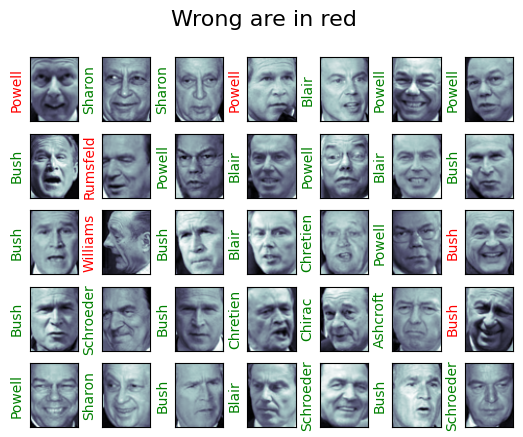

In [22]:
fig, ax = plt.subplots(5, 7)
for idx, axidx in enumerate(ax.flat):
  axidx.imshow(X_test[idx].reshape(62,47), cmap='bone')
  axidx.set(xticks=[],yticks=[])
  axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1], color='green' if y_pred[idx]==y_test[idx] else 'red')
  fig.suptitle('Wrong are in red', size=16)


##Evaluate model performance using classification report

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.75      0.78        24
     Colin Powell       0.70      0.90      0.79        48
  Donald Rumsfeld       0.57      0.81      0.67        16
    George W Bush       0.90      0.90      0.90       100
Gerhard Schroeder       0.85      0.74      0.79        23
      Hugo Chavez       0.80      0.89      0.84         9
   Jacques Chirac       0.75      0.38      0.50         8
    Jean Chretien       1.00      0.60      0.75        15
    John Ashcroft       0.90      0.69      0.78        13
Junichiro Koizumi       1.00      0.82      0.90        11
  Serena Williams       0.85      0.92      0.88        12
       Tony Blair       0.87      0.82      0.84        33

         accuracy                           0.82       312
        macro avg       0.83      0.77      0.79       312
     weighted avg       0.84      0.82      0.82       312



##Plot confusion matrix

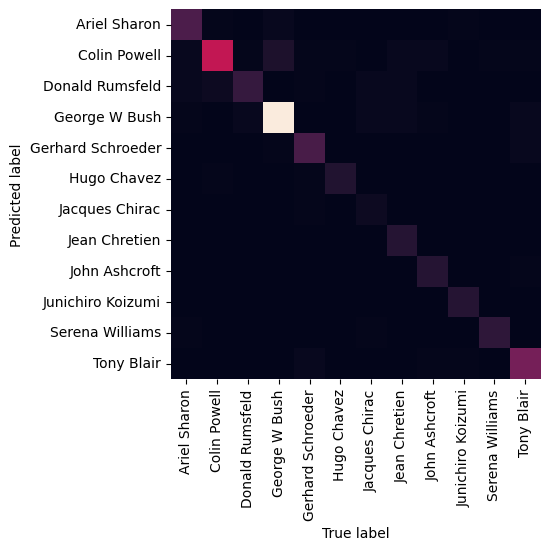

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()